Código utilizado na resolução do exercicio 2. Aqui basicamente foi aplicado um algoritimo de regressão linear considerando os atributos que mais apresentaram correlação entre si. Aqui foi tentado alguns outros algoritimos além da regressão linear.

In [1]:
%matplotlib inline
%pylab inline

# Importar bibliotecas
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score, r2_score
import json

# Ler os dados dos estudantespre
student_train_data = pd.read_csv("train.csv")
student_test_data = pd.read_csv("test2.csv")
print("Os dados dos estudantes foram lidos com êxito!")

Populating the interactive namespace from numpy and matplotlib
Os dados dos estudantes foram lidos com êxito!


In [2]:
def prepare_data(data):
    # TODO: Calcule o número de estudante
    n_students = len(data.index)

    # TODO: Calcule o número de atributos
    n_features = len(data.columns) -1

    print(f'Estudantes: {n_students}')
    print(f'Features: {n_features}')

    columns = ['NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_LC', 'NU_NOTA_CH']
    if 'NU_NOTA_MT' in data.columns:
        columns.append('NU_NOTA_MT')
        data['NU_NOTA_MT'].fillna(0, inplace=True)
        
    data['NU_NOTA_REDACAO'].fillna(0, inplace=True)
    data['NU_NOTA_CN'].fillna(0, inplace=True)
    data['NU_NOTA_LC'].fillna(0, inplace=True)
    data['NU_NOTA_CH'].fillna(0, inplace=True)

    data[columns] = data[columns].astype(float)
    
    return data

student_train_data = prepare_data(student_train_data)
student_test_data = prepare_data(student_test_data)

Estudantes: 13626
Features: 166
Estudantes: 4557
Features: 46


In [3]:
columns_train = ['CO_UF_RESIDENCIA', 'NU_IDADE','TP_SEXO','TP_COR_RACA','TP_NACIONALIDADE','TP_ST_CONCLUSAO','TP_ANO_CONCLUIU','TP_ESCOLA','TP_ENSINO','IN_TREINEIRO','TP_DEPENDENCIA_ADM_ESC','IN_BAIXA_VISAO','IN_CEGUEIRA','IN_SURDEZ','IN_DISLEXIA','IN_DISCALCULIA','IN_SABATISTA','IN_GESTANTE','IN_IDOSO','TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','TP_LINGUA','TP_STATUS_REDACAO','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO','Q001','Q002','Q006','Q024','Q025','Q026','Q027','Q047']

def get_atributos(data):

    data = data[columns_train]
    data = data.fillna(0)
    

    # TODO: Calcule o número de atributos
    n_features = len(data.columns) -1
    print(f'Features atuais: {n_features}')    

    return data

X_all = get_atributos(student_train_data)
y_all = X_all['NU_NOTA_MT'] #.apply(lambda x: x*10).astype(np.int64)

Features atuais: 41


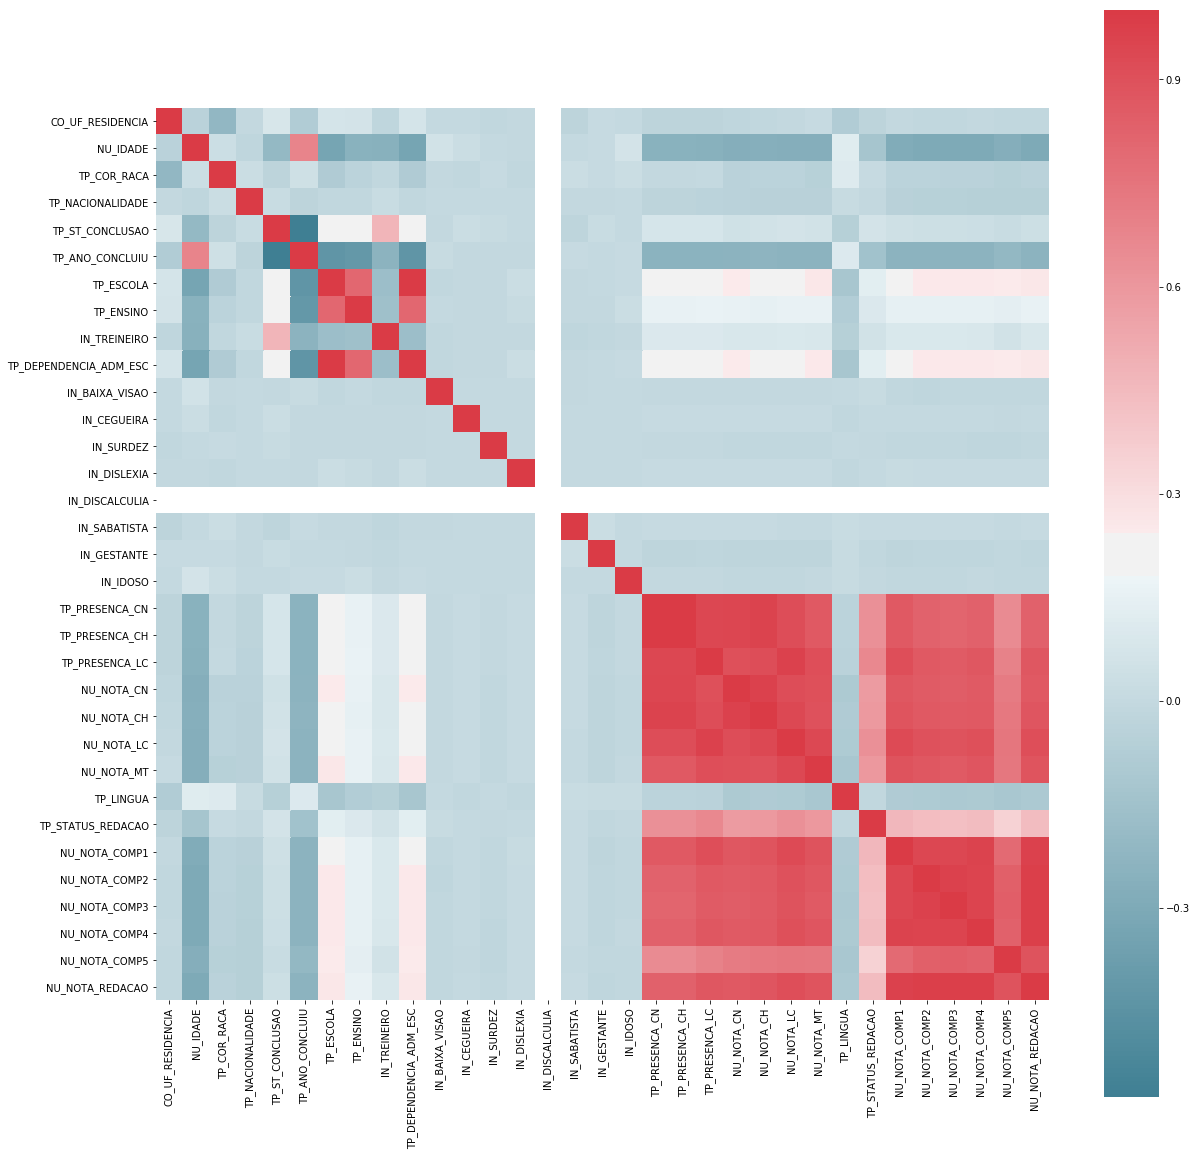

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from random import randint

max_v = len(X_all)-1

indices = [randint(0, max_v) for x in range(100) ]

samples = pd.DataFrame(X_all.loc[indices], columns = X_all.keys()).reset_index(drop = True)

samples = X_all
col = samples.columns

samples_col = samples[col]


f, ax = plt.subplots(figsize=(20, 20))
corr = X_all.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [7]:
columns_corr = ['TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','NU_NOTA_CN', 'NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO',
'TP_ESCOLA','TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC']

def preprocess_features(X, columns):
    ''' Pré-processa os dados dos estudantes e converte as variáveis binárias não numéricas em
        variáveis binárias (0/1). Converte variáveis categóricas em variáveis postiças. '''
    
    # Inicialize nova saída DataFrame
    output = pd.DataFrame(index = X.index)

    # Observe os dados em cada coluna de atributos 
    for col, col_data in X.iteritems():
        
        # Se o tipo de dado for não numérico, substitua todos os valores yes/no por 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['F', 'M'], [1, 0])

        # Se o tipo de dado for categórico, converta-o para uma variável dummy
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Reúna as colunas revisadas
        output = output.join(col_data)
    
    return output

X_all_corr = preprocess_features(X_all, columns_corr)[columns_corr]
#X_all_corr = X_all_corr.drop(['NU_NOTA_MT'],axis=1)
X_all_corr.fillna(0, inplace=True)

#X_test = preprocess_features(student_test_data)[columns_corr]
#X_test.fillna(0, inplace=True)


#X_all_corr = X_all_corr.select_dtypes(['float64']).apply(lambda x: x* 10).astype(np.int64)


print("Processed feature columns ({} total features):\n{}".format(len(X_all_corr.columns), list(X_all_corr.columns)))




Processed feature columns (15 total features):
['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'TP_ESCOLA', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC']


/home/leonardo/.local/share/virtualenvs/codenation-YwVN8dKC/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b580505f8>,
      dtype=object)

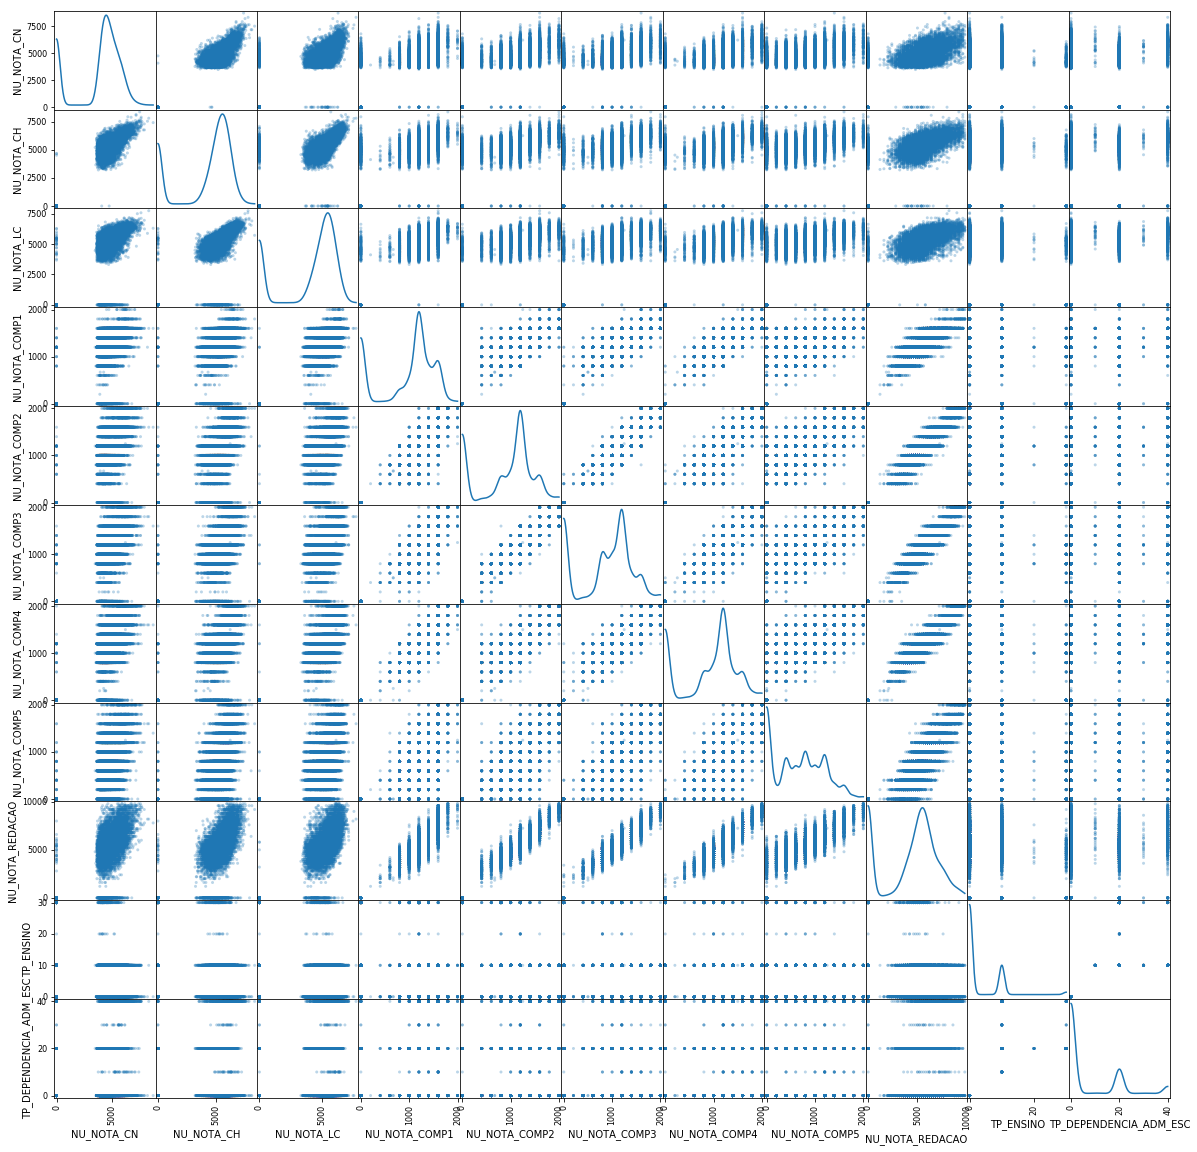

In [9]:
# TODO: Escalone os dados utilizando o algoritmo natural
log_data = np.log(X_all_corr)

# Produza uma matriz de dispersão para cada par de atributos novos-transformados
pd.plotting.scatter_matrix(X_all_corr, alpha = 0.3, figsize = (20,20), diagonal = 'kde')



In [8]:
def train_classifier(clf, X_train, y_train):
    ''' Ajusta um classificador para os dados de treinamento. '''
    
    # Inicia o relógio, treina o classificador e, então, para o relógio
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Imprime os resultados
    print("O modelo foi treinado em {:.4f} segundos".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Faz uma estimativa utilizando um classificador ajustado baseado na pontuação F1. '''
    
    # Inicia o relógio, faz estimativas e, então, o relógio para
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Imprime os resultados de retorno
    print( "As previsões foram feitas em {:.4f} segundos.".format(end - start))
    #return f1_score(target.values, y_pred, pos_label='yes')
    return r2_score(target, y_pred)


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Treina e faz estimativas utilizando um classificador baseado na pontuação do F1. '''
    
    # Indica o tamanho do classificador e do conjunto de treinamento
    print ("Treinando um {} com {} pontos de treinamento. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Treina o classificador
    train_classifier(clf, X_train, y_train)
    
    # Imprime os resultados das estimativas de ambos treinamento e teste
    print( "Pontuação F1 para o conjunto de treino: {:.4f}.".format(predict_labels(clf, X_train, y_train)))
    print( "Pontuação F1 para o conjunto de teste: {:.4f}.".format(predict_labels(clf, X_test, y_test)))

In [9]:
from sklearn.model_selection import train_test_split

# TODO: Emabaralhe e distribua o conjunto de dados de acordo com o número de pontos de treinamento e teste abaixo
X_train, X_test, y_train, y_test = train_test_split(X_all_corr,y_all,
                                                    test_size=0.25,
                                                    random_state=18)

# Mostre o resultado da distribuição
print("O conjunto de treinamento tem {} amostras.".format(X_train.shape[0]))
print("O conjunto de teste tem {} amostras.".format(X_test.shape[0]))

O conjunto de treinamento tem 10219 amostras.
O conjunto de teste tem 3407 amostras.


In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, SVR
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression, LinearRegression

# TODO: Inicialize os três modelos
clf_A = GaussianNB()
clf_B =  DecisionTreeClassifier(criterion="entropy",random_state=0)
clf_C = SVC(random_state=0)
clf_D = LogisticRegression()
clf_E = LinearRegression()


# TODO: Executar a função 'train_predict' para cada classificador e cada tamanho de conjunto de treinamento
# train_predict(clf, X_train, y_train, X_test, y_test)

#print(X_all.dtypes)
#print(y_train.dtypes)

X_train_300, y_train_300 = resample(X_train,y_train,n_samples=300,random_state=0)

for clf in [clf_E]:
    print("\n{}: \n".format(clf.__class__.__name__))
    train_predict(clf, X_train_300, y_train_300, X_test, y_test)



LinearRegression: 

Treinando um LinearRegression com 300 pontos de treinamento. . .
O modelo foi treinado em 0.0013 segundos
As previsões foram feitas em 0.0003 segundos.
Pontuação F1 para o conjunto de treino: 0.9042.
As previsões foram feitas em 0.0065 segundos.
Pontuação F1 para o conjunto de teste: 0.8936.


In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV 
from sklearn.cross_validation import ShuffleSplit

def performance_metric(y_true, y_predict):
    """ Calcular e retornar a pontuação de desempenho entre 
        valores reais e estimados baseado na métrica escolhida. """
    
    # TODO: Calcular a pontuação de desempenho entre 'y_true' e 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Devolver a pontuação
    return score

def fit_model(X, y):
    """ Desempenhar busca em matriz sobre o parâmetro the 'max_depth' para uma 
        árvore de decisão de regressão treinada nos dados de entrada [X, y]. """
    
    # Gerar conjuntos de validação-cruzada para o treinamento de dados
    cv_sets = ShuffleSplit(X.shape[0], n_iter=15, test_size = 0.20, random_state = 42)
    
    # TODO: Gerar uma árvore de decisão de regressão de objeto
    regressor = DecisionTreeRegressor()

    # TODO: Gerar um dicionário para o parâmetro 'max_depth' com um alcance de 1 a 10
    params = {'max_depth': [1,2,3,4,5,6,7,8,9,10]}

    # TODO: Transformar 'performance_metric' em uma função de pontuação utilizando 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Gerar o objeto de busca em matriz
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)

    # Ajustar o objeto de busca em matriz com os dados para calcular o modelo ótimo
    grid = grid.fit(X, y)

    # Devolver o modelo ótimo depois de realizar o ajuste dos dados
    return grid.best_estimator_


# Ajustar os dados de treinamento para o modelo utilizando busca em matriz
reg = fit_model(X_all_corr,y_all)

# Produzir valores para 'max_depth'
print("O parâmetro 'max_depth' é {} para o modelo ótimo.".format(reg.get_params()['max_depth']))

# Mostrar estimativas
y_pred = reg.predict(X_test)
# Calcular o desempenho deste modelo
score = performance_metric(y_test, y_pred)
print("O coeficiente de determinação, R^2, do modelo é {:.3f}.".format(score))


O parâmetro 'max_depth' é 5 para o modelo ótimo.
O coeficiente de determinação, R^2, do modelo é 0.916.


In [30]:
columns_train = ['CO_UF_RESIDENCIA', 'NU_IDADE','TP_SEXO','TP_COR_RACA','TP_NACIONALIDADE','TP_ST_CONCLUSAO','TP_ANO_CONCLUIU','TP_ESCOLA','TP_ENSINO','IN_TREINEIRO','TP_DEPENDENCIA_ADM_ESC','IN_BAIXA_VISAO','IN_CEGUEIRA','IN_SURDEZ','IN_DISLEXIA','IN_DISCALCULIA','IN_SABATISTA','IN_GESTANTE','IN_IDOSO','TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','TP_LINGUA','TP_STATUS_REDACAO','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO','Q001','Q002','Q006','Q024','Q025','Q026','Q027','Q047']

def get_atributos_test(data):

    data = data[columns_train]
    data = data.fillna(0)
    

    # TODO: Calcule o número de atributos
    n_features = len(data.columns) -1
    print(f'Features atuais: {n_features}')    

    return data

X_test_all = get_atributos_test(student_test_data)

X_test_all = preprocess_features(X_test_all, columns_corr)[columns_corr]
X_test_all.fillna(0, inplace=True)
#X_test_all = X_test_all.select_dtypes(['float64']).apply(lambda x: x* 10).astype(np.int64)


print("Processed feature columns ({} total features):\n{}".format(len(X_test_all.columns), list(X_test_all.columns)))


y_pred = reg.predict(X_test_all)

Features atuais: 40
Processed feature columns (15 total features):
['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'TP_ESCOLA', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC']


In [16]:
len(y_pred)

4557

In [31]:
student_data = student_test_data[['NU_INSCRICAO']]
student_data['NU_NOTA_MT'] = y_pred
answer = json.loads(student_data[['NU_INSCRICAO', 'NU_NOTA_MT']].to_json(orient="records"))
#np.average(student_data["NU_NOTA_MT"])
data_post = dict(
    token="40d8e606ca7a56e00ebfffd548fcd44f5c648bf7",
    email="paulorodriguesxv@gmail.com",
    answer=answer)

print(data_post)


{'token': '40d8e606ca7a56e00ebfffd548fcd44f5c648bf7', 'email': 'paulorodriguesxv@gmail.com', 'answer': [{'NU_INSCRICAO': '38ca729a0142743fb1a4ce3d993c043706d90d19', 'NU_NOTA_MT': 529.9434826884}, {'NU_INSCRICAO': 'c62a5029b3baf6d52e3dafee3d05a0a5e7631faa', 'NU_NOTA_MT': 0.0}, {'NU_INSCRICAO': 'd995a503e735c3e18c90160045772529097af8fd', 'NU_NOTA_MT': 569.0707692308}, {'NU_INSCRICAO': '7b3d4ee04876cd1cf86071f97edbd0ece1692575', 'NU_NOTA_MT': 529.9434826884}, {'NU_INSCRICAO': 'c960830f0f4b6a432670d60f3a5260df9445a1c4', 'NU_NOTA_MT': 468.2634146341}, {'NU_INSCRICAO': '331ba22c0a1327402a8180926312dc3ea6bf49ea', 'NU_NOTA_MT': 463.3346853147}, {'NU_INSCRICAO': '9a096f578cf206bbb34e9b64539990acf8be59aa', 'NU_NOTA_MT': 0.0}, {'NU_INSCRICAO': 'bf0650e824d3d19e63b84aca5ec52fc86c0c0f06', 'NU_NOTA_MT': 507.0012645914}, {'NU_INSCRICAO': '8c5cb4c64c80e4be3967d95eddecdbb7215100b7', 'NU_NOTA_MT': 438.4765031354}, {'NU_INSCRICAO': '1f0970574ea3129bc0637bf7d5e6ef62a9f8a994', 'NU_NOTA_MT': 438.4765031354}

/home/leonardo/.local/share/virtualenvs/codenation-YwVN8dKC/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [32]:
url = "https://api.codenation.com.br/v1/user/acceleration/data-science/challenge/enem-2/submit"

import requests

r = requests.post(url, json=data_post)

print(r.json())

{'score': 90.61340336373902}
